# Project: Investigate a Dataset (Kritika Malhotra)

# INTRODUCTION

### I am using the "IMDb movie dataset for this project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Such data can be used to predict the success of a movie even before it is released. A successful movie can be evaluated by its popularity, vote average score or revenue.
### Looking at how the data is in the dataset, I have tried to explore certain questions such as:
### 1.  Which year has the highest release of movies?
### 2.  Which movie had the highest and lowest earned profit?
### 3. Which Movie received the highest vote average?
### 4. Which genre has the highest release of movies?



In [52]:
# Importing the required packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## DATA WRANGLING

In [4]:
# Loading the dataset
movies_data=pd.read_csv("tmdb-movies.csv")
movies_data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [51]:
movies_data.shape

(1992, 21)

# DATA CLEANING
## It involves removing duplicates and missing data (as it implies that data has not been recorded).
### Since I observed a lot of missing data (after getting the overview of the dataset using the .info() function), I removed the rows with missing data. Alongside, I removed the dataset for any duplicates, if present.

In [9]:
movies_data.isnull().sum(axis=0)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# There was only row with duplicate data. So, I removed it.
movies_data.drop_duplicates(inplace=True)
print(movies_data.duplicated().sum())

0


In [10]:
# double checking if the misisng data has been removed.
movies_data.dropna(inplace=True)
movies_data.isnull().sum(axis=0)

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

### The number of entried reduced to 1992 from 10866 but the indexes were not altered. So, I restored the indexes. 

In [12]:
movies_data = movies_data.reset_index(drop=True)
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date         

## The data in the column 'release_date' needs to be changed to the standard date time format

In [54]:

movies_data.release_date = pd.to_datetime(movies_data['release_date'])
movies_data.release_date

0      2015-06-09
1      2015-05-13
2      2015-03-18
3      2015-12-15
4      2015-04-01
          ...    
1987   2069-12-12
1988   1978-10-25
1989   1978-07-27
1990   1978-05-01
1991   1978-07-28
Name: release_date, Length: 1992, dtype: datetime64[ns]

### The column‘genres’ contain multiple values separated by pipe (|) characters. So, I split it into multiple columns and merged it to the original dataset.

In [13]:
split_data = movies_data["genres"].str.split("|")
data = split_data.to_list()
names = ["genre1", "genre2", "genre3", "genre4", "genre5"]
new_df = pd.DataFrame(data, columns=names)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre1  1992 non-null   object
 1   genre2  1638 non-null   object
 2   genre3  1017 non-null   object
 3   genre4  375 non-null    object
 4   genre5  101 non-null    object
dtypes: object(5)
memory usage: 77.9+ KB


In [14]:
merged_df = movies_data.merge(new_df, left_index=True, right_index=True, how='inner')
merged_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,258,6.4,1969,4.160985e+07,4.872780e+08,Adventure,Action,Thriller,None,None
1988,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,522,7.3,1978,1.002810e+06,2.339890e+08,Horror,Thriller,None,None,None
1989,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,230,6.7,1978,9.025292e+06,4.713208e+08,Comedy,None,None,None,None
1990,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,33,8.0,1978,0.000000e+00,1.076189e+06,Documentary,Music,None,None,None


# Exploratory Data Analysis
## Now that I have cleaned and trimmed the dataset, I am ready to move forward to exploring the dataset. This will involve computing the statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 

## Question 1. Which year has the highest release of movies?

In [18]:
# Making group for each release year and count the number of movies in each year
data=merged_df.groupby('release_year').count()['id']
print(data.tail(10))

release_year
2006     92
2007    135
2008    142
2009    192
2010    206
2011    219
2012    145
2013    128
2014    153
2015    165
Name: id, dtype: int64


Text(0, 0.5, 'Number Of Movies')

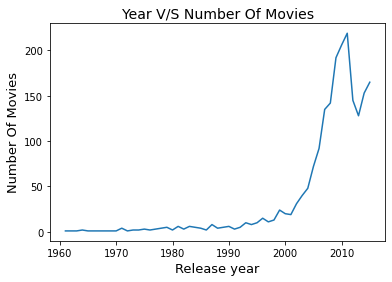

In [17]:
#Another way of doing that: merged_df.groupby('release_year')['id'].size()
#Creatng visulaization:
merged_df.groupby('release_year').count()['id'].plot(kind='line')
plt.title("Year V/S Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)

## Looking at the graph, the highest number of movies were released in the year 2011.

In [26]:
# Double-checking
x=data.to_frame()
x.info()
x.loc[x["id"].idxmax()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1961 to 2015
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      53 non-null     int64
dtypes: int64(1)
memory usage: 2.9 KB


id    219
Name: 2011, dtype: int64

## Question 2. Which Movie Has The Highest Or Lowest Profit?

In [27]:
# Adding a new column to calculate profit of each movie
merged_df['Profit'] = merged_df['revenue'] - merged_df['budget']
merged_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5,Profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None,1316249360


In [58]:
x=merged_df['Profit'].max()
y=merged_df['Profit'].idxmax()
y1=merged_df['Profit'].idxmin()
z=merged_df.iloc[321]
z1=merged_df['original_title'][y]
z2=merged_df['original_title'][y1]
print("The movie with highest profit is: {}" .format(z1))
print("The movie with lowest profit  is: {}" .format(z2))

The movie with highest profit is: Avatar
The movie with lowest profit  is: The Warrior's Way


In [65]:
# Performing the same task using a function:
#defining the function
def calculate(profit):
    #for highest earned profit
    high= merged_df[profit].idxmax()
    high_title=merged_df['original_title'][high]
    
    
    #for lowest earned profit
    low= merged_df[profit].idxmin()
    low_title=merged_df['original_title'][low]
  
    
    info=print("The movie with highest and lowest profit is {} and {}, respectively." .format(high_title, low_title))
    
    return info

#calling the function
calculate('Profit')

The movie with highest and lowest profit is Avatar and The Warrior's Way, respectively.


In [71]:
#collecting data in one place in a dataframe
high= merged_df['Profit'].idxmax()
low= merged_df['Profit'].idxmin()
high_details=pd.DataFrame(merged_df.loc[high])
low_details=pd.DataFrame(merged_df.loc[low])
info=pd.concat([high_details, low_details], axis=1)
info

,321,679
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


## Question 3. Which Movie received the highest vote average?

In [75]:
# Creating a function to find out the names of the movies with highest and lowest vote averages

def maxmin(x):
    maxp=merged_df[x].idxmax()
    minp=merged_df[x].idxmin()
    print("The movie that received the highest vote average is {}".format(merged_df['original_title'][maxp]))
    print("The movie that received the lowest vote average is {}".format(merged_df['original_title'][minp]))
maxmin('vote_average')
#"The movie with highest and lowest profit is {} and {}, respectively."

The movie that received the highest vote average is The Godfather
The movie that received the lowest vote average is Superbabies: Baby Geniuses 2


Text(0.5, 1.0, 'Correlation between average votes and profit earned')

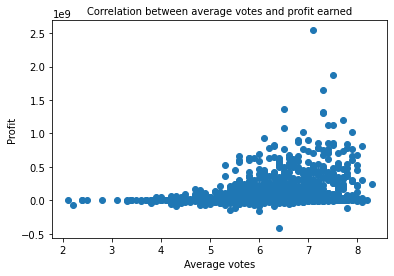

In [35]:
# Checking if there is correlation between the profit earned and the vote average of each movie
plt.scatter(data= merged_df, x='vote_average', y='Profit') 
plt.xlabel('Average votes')
plt.ylabel('Profit')
plt.title("Correlation between average votes and profit earned",fontsize = 10)

In [37]:
r = np.corrcoef(merged_df['vote_average'], merged_df['Profit'])
r

array([[1.        , 0.27420015],
       [0.27420015, 1.        ]])

## Since the correlation coefficient is very small, it seems that the profit earned by the movies not directly related to the average votes received .

## Question 4. Which genre has the highest release of movies?

In [41]:
data_plot = merged_df['genres'].str.cat(sep = '|')
data = pd.Series(data_plot.split('|'))
data

0                Action
1             Adventure
2       Science Fiction
3              Thriller
4                Action
             ...       
5118             Comedy
5119        Documentary
5120              Music
5121             Action
5122             Comedy
Length: 5123, dtype: object

In [48]:
# Counting the number of each unique genre
t=data.value_counts()
t

Drama              838
Comedy             640
Thriller           575
Action             532
Adventure          361
Romance            291
Science Fiction    291
Horror             273
Crime              262
Family             233
Fantasy            202
Animation          170
Mystery            148
Documentary         93
Music               72
History             56
War                 44
Western             20
TV Movie            16
Foreign              6
dtype: int64

<AxesSubplot:>

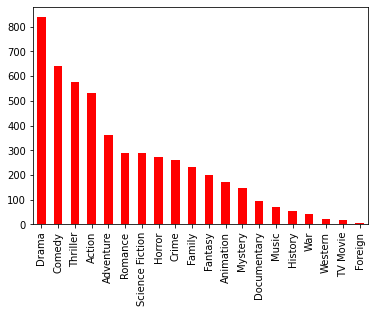

In [49]:
#Plotting the data
t.plot.bar(color='red')

## From the graph and the data, it is apparent that 'Drama' genre has the highest release of movies. 

# Conclusion
## From the analysis above, I would draw the following conclusions:
## 1. The highest number of movies were released in the year 2011.
## 2. The movie with highest and lowest profit is Avatar and The Warrior's Way, respectively.
## 3. The movie that received the highest and lowest vote average is The Godfather and Superbabies: Baby Geniuses 2, respectively. 
## 'Drama' genre has the highest release of movies.
